In [ ]:
model, history, prediction = load_model('conv1000')
model.compile
draw_histogram(test_datac, test_labels, model)


## Compare all models in the "models" folder

In [1]:
import setGPU0
import os
from io_functions import *
from draw_functions import *
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Couldn't import dot_parser, loading of dot files will not be possible.
using

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


 gpu0


In [2]:
train_datad, test_datad, train_labels, test_labels = train_test(shape=(10000,), split=0.33)
train_datac, test_datac, train_labels, test_labels = train_test(shape=(1, 20, 20, 25), split=0.33)

In [ ]:

# Quick way to make and save predictions for future use (won't need in the future)

### CHOOSE WHICH MODEL TO USE ###
label = 'dense100long'
### CHOOSE WHICH MODEL TO USE ###

# Get model and compile
model, history, pred = load_model(label)
model.compile(loss='binary_crossentropy', optimizer='sgd')

# Predict based on whether conv or not
if label[0]=='c':
    predict = model.predict(test_datac)
elif label[0]=='b':
    predict = model.predict([test_datac, test_datac, test_datac])
else:
    predict = model.predict(test_datad)
    
# Save
predict.reshape(predict.shape[0])
pickle.dump( (predict, test_labels), open('models/%s_p.pkl'%label,'w'))


In [3]:
# Load the models' predictions and histories
predictions = {}
histories = {}
for l in filter(None, os.popen('ls models/*.json').read().split('\n')):
    m_name = l.split('/')[-1].split('.')[0]
    
    # Load model information
    model, history, prediction = load_model(m_name)
    if prediction: predictions[m_name] = prediction
    else: print m_name + " needs predictions. Run previous codebox with label='"+m_name+"' to remedy this issue."
    histories[m_name] = history

### Plot all

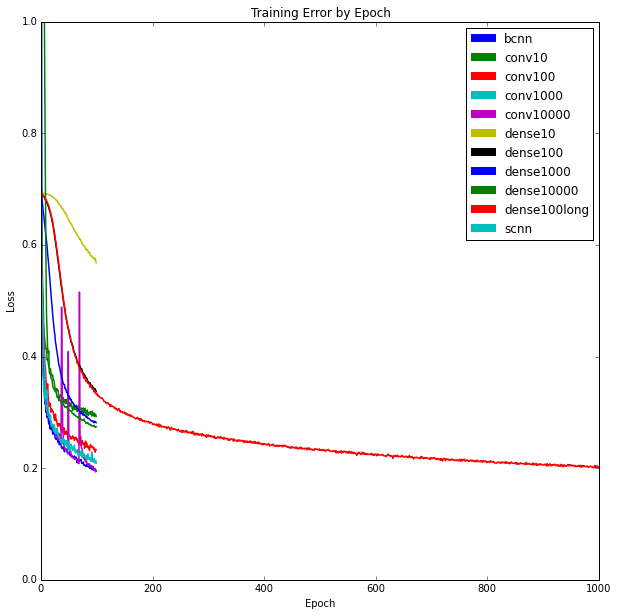

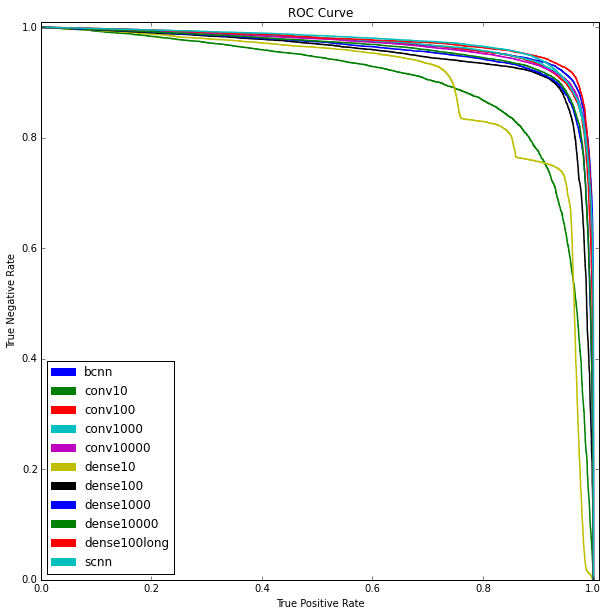

In [4]:
draw_list(sorted(predictions.keys()), predictions, histories)

## Plot Convolutional


In [ ]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'conv' in k]
draw_list(label_list, predictions, histories)

## Plot Dense


In [ ]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'dense' in k and not 'long' in k]
draw_list(label_list, predictions, histories)

## Plot Branched and Large

In [ ]:
draw_list(['scnn', 'bcnn', 'conv10000', 'dense10000', 'dense100long'], predictions, histories)

In [ ]:
label_list = [k for k,v in sorted(predictions.iteritems()) if 'long' in k]


In [ ]:
label_list